In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# %matplotlib inline

# import datasets

In [3]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

# explore data

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.shape

(891, 12)

In [8]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


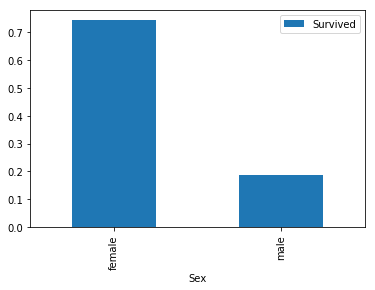

In [10]:
df_train.pivot_table(index= 'Sex', values='Survived').plot.bar()
plt.show()

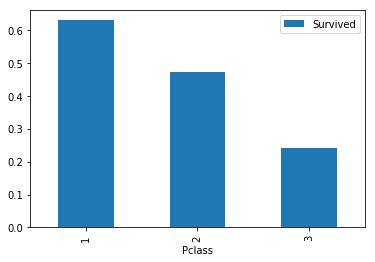

In [11]:
df_train.pivot_table(index= 'Pclass', values='Survived').plot.bar()
plt.show()

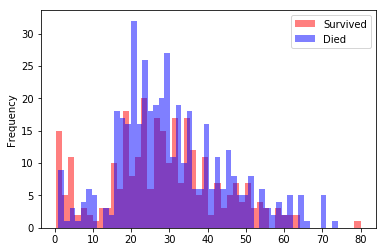

In [12]:
survived = df_train[df_train["Survived"] == 1]
died = df_train[df_train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

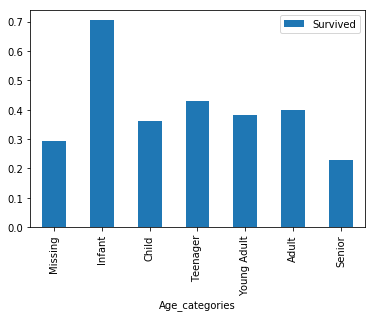

In [13]:
# divide age into age groups
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

df_train = process_age(df_train,cut_points,label_names)
df_test = process_age(df_test,cut_points,label_names)

age_cat_pivot = df_train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

In [14]:
# separate pclass into 3 columns
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df_train = create_dummies(df_train,"Pclass")
df_test = create_dummies(df_test,"Pclass")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,1


In [15]:
df_train = create_dummies(df_train,"Sex")
df_test = create_dummies(df_test,"Sex")
df_train = create_dummies(df_train,"Age_categories")
df_test = create_dummies(df_test,"Age_categories")

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


# Preprocessing - process Nan

In [20]:
df_train.isna().sum()

PassengerId                     0
Survived                        0
Pclass                          0
Name                            0
Sex                             0
Age                             0
SibSp                           0
Parch                           0
Ticket                          0
Fare                            0
Cabin                         687
Embarked                        2
Age_categories                  0
Pclass_1                        0
Pclass_2                        0
Pclass_3                        0
Sex_female                      0
Sex_male                        0
Age_categories_Missing          0
Age_categories_Infant           0
Age_categories_Child            0
Age_categories_Teenager         0
Age_categories_Young Adult      0
Age_categories_Adult            0
Age_categories_Senior           0
dtype: int64

### Age

In [7]:
age_mean = df_train['Age'][df_train['Age'].notnull()].mean()
df_train['Age'] = df_train['Age'].fillna(age_mean.round())

### Cabin

In [8]:
df_cabin = df_train[['Cabin', 'Fare']].sort_values(by='Fare', ascending=False)
df_cabin['Cabin'][df_cabin['Cabin'].notnull()].unique()

array(['B101', 'B51 B53 B55', 'C23 C25 C27', 'B57 B59 B63 B66', 'B58 B60',
       'C62 C64', 'C45', 'C95', 'C82', 'B5', 'B3', 'C7', 'C125', 'C91',
       'C22 C26', 'B80', 'B78', 'C32', 'C99', 'E34', 'E40', 'B96 B98',
       'D36', 'D48', 'C68', 'C70', 'C65', 'C86', 'B69', 'B73', 'B49',
       'C93', 'C78', 'C92', 'B79', 'B77', 'C83', 'C50', 'E49', 'C54',
       'A34', 'B28', 'E67', 'E68', 'B86', 'B82 B84', 'B41', 'C46', 'D20',
       'D9', 'D7', 'D11', 'D26', 'D33', 'D49', 'D15', 'D37', 'C85', 'B22',
       'B35', 'C2', 'D10 D12', 'B30', 'E31', 'B18', 'B20', 'A20', 'E36',
       'E44', 'E50', 'E33', 'E8', 'D30', 'C123', 'D35', 'D19', 'C126',
       'B71', 'A14', 'C110', 'E46', 'D21', 'C101', 'A24', 'A32', 'C90',
       'B39', 'A10', 'A16', 'D28', 'F4', 'E63', 'A26', 'T', 'C52', 'A6',
       'C128', 'A5', 'D46', 'B19', 'D50', 'A31', 'A7', 'C30', 'C104',
       'C106', 'B50', 'D45', 'C148', 'D6', 'A23', 'B42', 'C47', 'B37',
       'C118', 'C49', 'C124', 'C111', 'B4', 'E12', 'E38', 'C103

In [9]:
df_cabin_2 = df_cabin[df_cabin['Cabin'].notnull()]
A = df_cabin_2[df_cabin_2['Cabin'].str.contains('A')]['Fare']
B = df_cabin_2[df_cabin_2['Cabin'].str.contains('B')]['Fare']
C = df_cabin_2[df_cabin_2['Cabin'].str.contains('C')]['Fare']
D = df_cabin_2[df_cabin_2['Cabin'].str.contains('D')]['Fare']
E = df_cabin_2[df_cabin_2['Cabin'].str.contains('E')]['Fare']
F = df_cabin_2[df_cabin_2['Cabin'].str.contains('F')]['Fare']
G = df_cabin_2[df_cabin_2['Cabin'].str.contains('G')]['Fare']

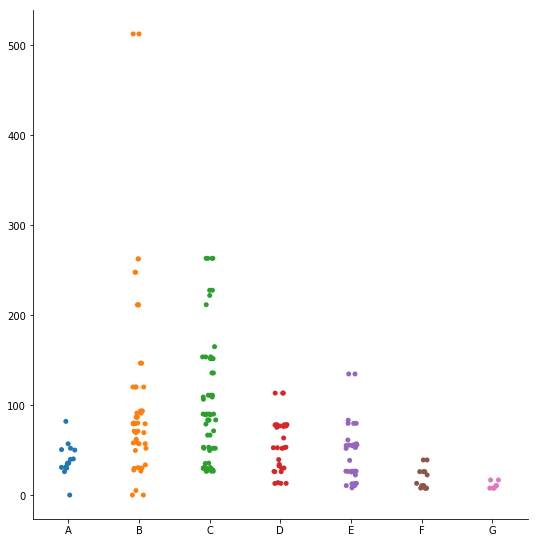

In [10]:
# The fare of passengers separated by the first letter of the cabin name
data = {'A' : A.values, 'B' : B.values, 'C' : C.values, 'D' : D.values, 'E' : E.values, 'F' : F.values, 'G' : G.values}
df_cabin_3 = pd.DataFrame({key: pd.Series(value) for key, value in data.items()})

a = sns.catplot(data=df_cabin_3)
a.fig.set_size_inches(8,8)

In [11]:
df_train = df_train.drop(columns='Cabin')

### Embarked

In [12]:
df_train = df_train.drop(df_train[df_train['Embarked'].isna()].index)

In [13]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Convert categorical data to numerical data

In [14]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
le = preprocessing.LabelEncoder()

df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])
df_train = df_train.drop(columns = ['Name','Ticket'])
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# Training

In [116]:
# train a model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

columns = ['Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

lr.fit(df_train[columns], df_train['Survived'])

c:\users\henri\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
# split into test, train data sets
from sklearn.model_selection import train_test_split

columns = df_train.columns[13:]

all_x = df_train[columns]
all_y = df_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.2, random_state=0)

lr.fit(x_train, y_train)
prediction = lr.predict(x_test)

c:\users\henri\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [118]:
# measure the accuracy of the prediction
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, prediction)
accuracy

0.8100558659217877

In [121]:
# train on the entire train set 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(df_train[columns], df_train['Survived'])
prediction = lr.predict(df_test[columns])

c:\users\henri\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [138]:
my_submission = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived':prediction})
my_submission.to_csv('my_submission', index=False)
my_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
